In [1]:
import yfinance as yf

In [2]:
ticker = 'BTC-USD'

data = yf.download(ticker, auto_adjust=True, start = '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
import sys
sys.path.append("../")
sys.path.append("../algo_trader")

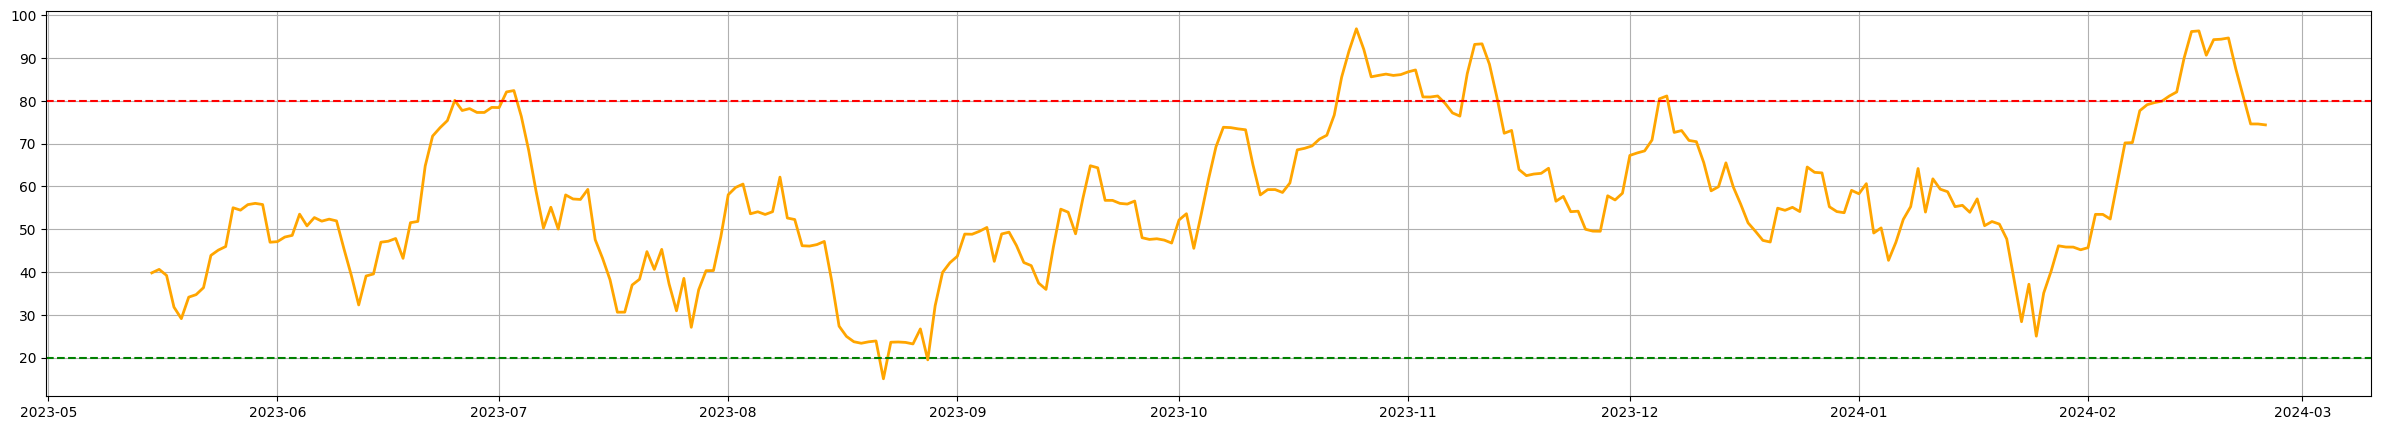

In [4]:
from algo_trader.lib.indicators.mfi import MFI

df = data.iloc[-300:]
sell_threshold = 80
buy_threshold = 20
mfi = MFI(buy_threshold, sell_threshold, 14)
mfi.calculate(df)
mfi.plot()

C:\Users\Pablo\AppData\Local\Temp\ipykernel_23100\2249791723.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mfi'] = mfi.calculate(df)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_23100\2249791723.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['buy_signal'] = mfi.calc_buy_signals()
C:\Users\Pablo\AppData\Local\Temp\ipykernel_23100\2249791723.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

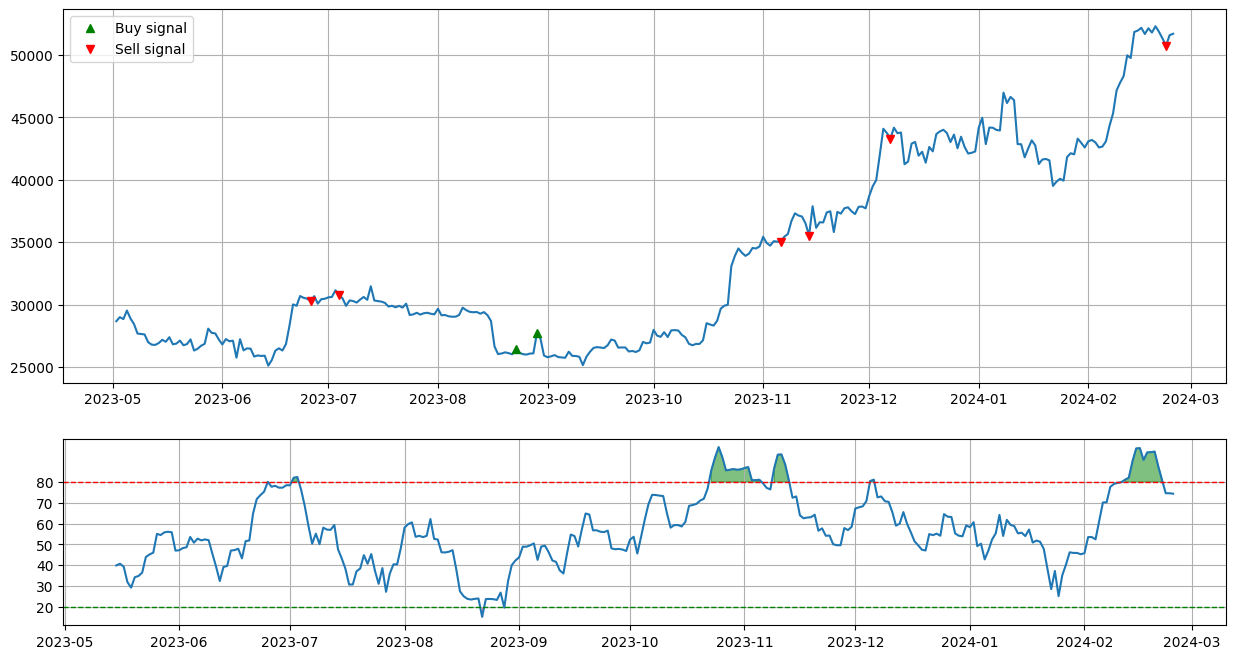

In [5]:
import matplotlib.pyplot as plt

# Armo los dos subgráficos con subplots
# figsize: Es la dimensión de toda la figura, que contiene los subgráficos
# nrows: Es la cantidad de subgráficos
# height_ratios: Se coloca la proporción de alturas entre los subgráficos (la cantidad de elementos debe coincidir con las nrows ingresadas)
fig, ax = plt.subplots(figsize=(15,8), nrows=2, gridspec_kw={'height_ratios' : [2,1]})

df['mfi'] = mfi.calculate(df)
df['buy_signal'] = mfi.calc_buy_signals()
df['sell_signal'] = mfi.calc_sell_signals()
buySignals = df[df['buy_signal'] == True]
sellSignals = df[df['sell_signal'] == True]

ax[0].plot(df.index, df.Close)
ax[0].plot(buySignals.index, buySignals.Close, '^', label='Buy signal', color='green')
ax[0].plot(sellSignals.index, sellSignals.Close, 'v', label='Sell signal', color='red')
ax[0].legend(loc='upper left')
ax[0].grid()

ax[1].plot(df.index, df.mfi)
ax[1].set_yticks(range(10,90,10))
ax[1].axhline(buy_threshold, linestyle='--', linewidth=1, color='green')
ax[1].axhline(sell_threshold, linestyle='--', linewidth=1, color='red')
ax[1].fill_between(df.index, df.mfi, sell_threshold, where=df.mfi>sell_threshold, alpha=0.5, color='green')
ax[1].fill_between(df.index, df.mfi, buy_threshold, where=df.mfi<buy_threshold, alpha=0.5, color='red')
ax[1].grid()

In [6]:
new_record = data.iloc[-1:]
mfi.predict_signal(new_record)

[MFI] Current value: 68.8426165499657
[MFI] Sell Threshold: 80
[MFI] Buy Threshold: 20
[MFI] Signal: Action.HOLD


<Action.HOLD: 'hold'>